# ML2 Assignment 

## TASK 1 — Model Development and Experiment Design

**Project Scope**
Goal: predict daily bike rental demand (cnt)

Dataset: day_2011.csv

Approach: regression + experiment comparison

Tools: scikit-learn + MLflow

In [18]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import matplotlib.pyplot as plt
import seaborn as sns

import mlflow
import mlflow.sklearn
import joblib

mlflow.set_tracking_uri("http://localhost:5000")

In [19]:
# Load dataset
df = pd.read_csv("day_2011.csv")
df.head()

,dteday,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,01/01/2011,1,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,02/01/2011,1,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,03/01/2011,1,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,04/01/2011,1,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,05/01/2011,1,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


In [20]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      365 non-null    object 
 1   season      365 non-null    int64  
 2   mnth        365 non-null    int64  
 3   holiday     365 non-null    int64  
 4   weekday     365 non-null    int64  
 5   workingday  365 non-null    int64  
 6   weathersit  365 non-null    int64  
 7   temp        365 non-null    float64
 8   atemp       365 non-null    float64
 9   hum         365 non-null    float64
 10  windspeed   365 non-null    float64
 11  cnt         365 non-null    int64  
dtypes: float64(4), int64(7), object(1)
memory usage: 34.3+ KB


,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,2.498630,6.526027,0.027397,3.008219,0.684932,1.421918,0.486665,0.466835,0.643665,0.191403,3405.761644
std,1.110946,3.452584,0.163462,2.006155,0.465181,0.571831,0.189596,0.168836,0.148744,0.076890,1378.753666
min,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,431.000000
25%,2.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.325000,0.321954,0.538333,0.135583,2132.000000
50%,3.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.479167,0.472846,0.647500,0.186900,3740.000000
75%,3.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.656667,0.612379,0.742083,0.235075,4586.000000
max,4.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.849167,0.840896,0.972500,0.507463,6043.000000


Target variable = cnt

Mix of categorical & numerical features

dteday is a date → cannot be used directly

### Data Preprocessing

In [21]:
# Raw date is removed to avoid leakage, while meaningful temporal patterns are preserved.
df['dteday'] = pd.to_datetime(df['dteday'], dayfirst=True)
df['year'] = df['dteday'].dt.year
df['month'] = df['dteday'].dt.month
df['dayofweek'] = df['dteday'].dt.dayofweek

df = df.drop(columns=['dteday'])

In [22]:
df.head()

,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,year,month,dayofweek
0,1,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985,2011,1,5
1,1,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801,2011,1,6
2,1,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349,2011,1,0
3,1,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562,2011,1,1
4,1,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600,2011,1,2


In [23]:
# Define X and y
X = df.drop(columns=['cnt'])
y = df['cnt']

In [24]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Experiment Design

### Model Training, Evaluation, and Comparison

**Experiment 1 - Baseline Model: Linear Regression**

In [25]:
mlflow.set_experiment("Bike_Sharing_Demand_Task1")

mlflow.sklearn.autolog()

2026/02/08 16:11:06 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of sklearn. If you encounter errors during autologging, try upgrading / downgrading sklearn to a supported version, or try upgrading MLflow.


In [26]:
with mlflow.start_run(run_name="Linear_Regression_Baseline"):
    lr = LinearRegression()
    lr.fit(X_train, y_train)

    # Predictions
    y_pred_train = lr.predict(X_train)
    y_pred_test = lr.predict(X_test)

    # Metrics
    train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
    test_mae = mean_absolute_error(y_test, y_pred_test)
    test_r2 = r2_score(y_test, y_pred_test)

    # Log parameters
    mlflow.log_param("model_type", "LinearRegression")

    # Log metrics
    mlflow.log_metric("train_RMSE", train_rmse)
    mlflow.log_metric("test_RMSE", test_rmse)
    mlflow.log_metric("test_MAE", test_mae)
    mlflow.log_metric("test_R2", test_r2)

    # Log model
    mlflow.sklearn.log_model(lr, "model")
    run_id = mlflow.active_run().info.run_id
    print("Baseline run_id:", run_id)

2026/02/08 16:11:07 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "C:\Users\Chong\anaconda3\envs\ML2Lesson\Lib\site-packages\mlflow\types\utils.py:406: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
2026/02/08 16:11:09 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "C:\Users\Chong\anaconda3\envs\ML2Lesson\

Baseline run_id: 4cfde121fe8440be9137c20eb80c3888


**Experiment 2 — Improved model: Random Forest**

In [28]:
with mlflow.start_run(run_name="RandomForest_Improved") as run:
    rf = RandomForestRegressor(
        n_estimators=400,
        max_depth=12,
        min_samples_leaf=3,
        random_state=42,
        n_jobs=-1
    )

    rf.fit(X_train, y_train)

    # Predictions
    y_pred_train = rf.predict(X_train)
    y_pred_test = rf.predict(X_test)

    # Metrics (test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
    mae = mean_absolute_error(y_test, y_pred_test)
    r2 = r2_score(y_test, y_pred_test)

    # Metrics (train) - optional but useful for overfitting check
    train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
    train_mae = mean_absolute_error(y_train, y_pred_train)
    train_r2 = r2_score(y_train, y_pred_train)

    # Log params (correct!)
    mlflow.log_param("model_type", "RandomForestRegressor")
    mlflow.log_param("n_estimators", 400)
    mlflow.log_param("max_depth", 12)
    mlflow.log_param("min_samples_leaf", 3)

    # Log metrics (consistent keys)
    mlflow.log_metric("rmse", rmse)
    mlflow.log_metric("mae", mae)
    mlflow.log_metric("r2", r2)

    mlflow.log_metric("train_rmse", train_rmse)
    mlflow.log_metric("train_mae", train_mae)
    mlflow.log_metric("train_r2", train_r2)

    # Log model
    mlflow.sklearn.log_model(rf, artifact_path="model")

    print("RandomForest run_id:", run.info.run_id)

2026/02/08 16:14:07 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "C:\Users\Chong\anaconda3\envs\ML2Lesson\Lib\site-packages\mlflow\types\utils.py:406: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
2026/02/08 16:14:08 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "C:\Users\Chong\anaconda3\envs\ML2Lesson\

RandomForest run_id: af0ea3aee2f44156b4e96f808b3a226c


### Model Selection and Registration

In [29]:
mlflow.register_model(
    model_uri="runs:/af0ea3aee2f44156b4e96f808b3a226c/model",
    name="Bike_Sharing_Demand_Model"
)

Registered model 'Bike_Sharing_Demand_Model' already exists. Creating a new version of this model...
2026/02/08 16:17:42 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: Bike_Sharing_Demand_Model, version 2
Created version '2' of model 'Bike_Sharing_Demand_Model'.


<ModelVersion: aliases=[], creation_timestamp=1770538662346, current_stage='None', description='', last_updated_timestamp=1770538662346, name='Bike_Sharing_Demand_Model', run_id='af0ea3aee2f44156b4e96f808b3a226c', run_link='', source='mlflow-artifacts:/963373707487152512/af0ea3aee2f44156b4e96f808b3a226c/artifacts/model', status='READY', status_message='', tags={}, user_id='', version='2'>

In [30]:
joblib.dump(lr, "Improved_model.joblib")

['Improved_model.joblib']

## TASK 2 — Data Drift Analysis and Impact Assessment 

In [39]:
def preprocess_with_date_features(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()

    # Parse date
    df['dteday'] = pd.to_datetime(df['dteday'], dayfirst=True)
    df['year'] = df['dteday'].dt.year
    df['month'] = df['dteday'].dt.month
    df['dayofweek'] = df['dteday'].dt.dayofweek


    # Drop raw date
    df.drop(columns=["dteday"], inplace=True)
    return df

df_2011 = preprocess_with_date_features(pd.read_csv("day_2011.csv"))
df_2012 = preprocess_with_date_features(pd.read_csv("day_2012.csv"))

best_model = joblib.load("Improved_model.joblib")

In [40]:
X_2011 = df_2011.drop(columns=["cnt"])
y_2011 = df_2011["cnt"]

X_2012 = df_2012.drop(columns=["cnt"])
y_2012 = df_2012["cnt"]

### Data Drift Analysis

In [41]:
drift_features = ["temp", "atemp", "hum", "windspeed"]

drift_stats = pd.DataFrame({
    "2011_mean": df_2011[drift_features].mean(),
    "2012_mean": df_2012[drift_features].mean(),
    "2011_std": df_2011[drift_features].std(),
    "2012_std": df_2012[drift_features].std(),
})

drift_stats

,2011_mean,2012_mean,2011_std,2012_std
temp,0.486665,0.504081,0.189596,0.176112
atemp,0.466835,0.481852,0.168836,0.156756
hum,0.643665,0.612166,0.148744,0.134206
windspeed,0.191403,0.189572,0.076890,0.078194


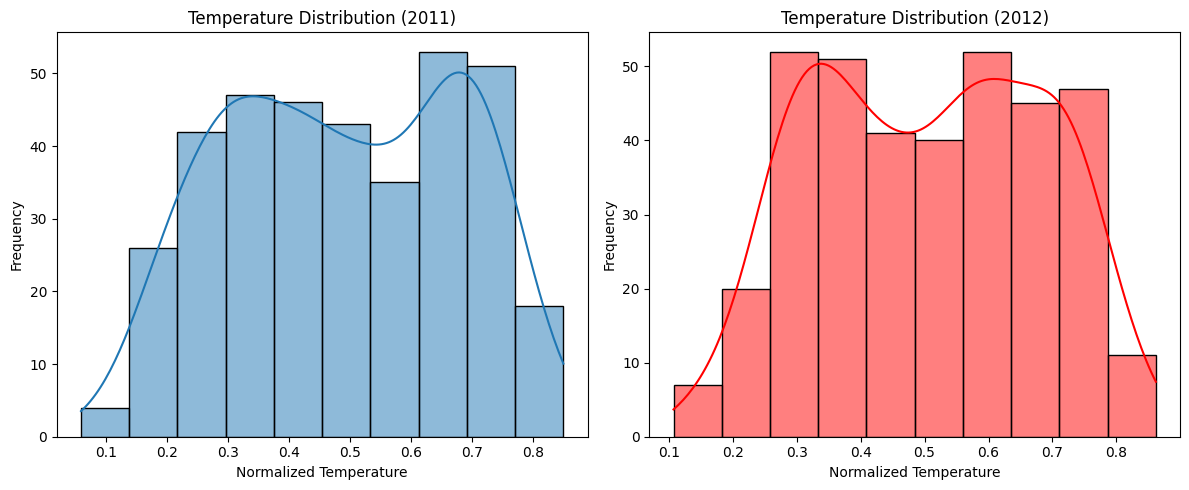

In [42]:
plt.figure(figsize=(12, 5))

# 2011 Temperature
plt.subplot(1, 2, 1)
sns.histplot(df_2011["temp"], kde=True)
plt.title("Temperature Distribution (2011)")
plt.xlabel("Normalized Temperature")
plt.ylabel("Frequency")

# 2012 Temperature
plt.subplot(1, 2, 2)
sns.histplot(df_2012["temp"], kde=True, color="red")
plt.title("Temperature Distribution (2012)")
plt.xlabel("Normalized Temperature")
plt.ylabel("Frequency")

plt.tight_layout()
plt.savefig("temp_drift_2011_2012.png")
plt.show()

### Impact of Drift on Model Performance

In [43]:

# Predictions
pred_2011 = best_model.predict(X_2011)
pred_2012 = best_model.predict(X_2012)

# Metrics
rmse_2011 = np.sqrt(mean_squared_error(y_2011, pred_2011))
rmse_2012 = np.sqrt(mean_squared_error(y_2012, pred_2012))

mae_2011 = mean_absolute_error(y_2011, pred_2011)
mae_2012 = mean_absolute_error(y_2012, pred_2012)

r2_2011 = r2_score(y_2011, pred_2011)
r2_2012 = r2_score(y_2012, pred_2012)

# Side-by-side comparison table
comparison_df = pd.DataFrame({
    "Metric": ["RMSE", "MAE", "R²"],
    "2011 (Train Period)": [rmse_2011, mae_2011, r2_2011],
    "2012 (Drifted Period)": [rmse_2012, mae_2012, r2_2012]
})

comparison_df = comparison_df.round(2)
comparison_df

2026/02/08 16:23:06 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "C:\Users\Chong\anaconda3\envs\ML2Lesson\Lib\site-packages\mlflow\types\utils.py:406: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
2026/02/08 16:23:08 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "C:\Users\Chong\anaconda3\envs\ML2Lesson\

,Metric,2011 (Train Period),2012 (Drifted Period)
0,RMSE,678.76,2340.00
1,MAE,514.69,2136.78
2,R²,0.76,-0.72


### Drift Response and Operational Decision

**Recommended Operational Action: Retrain the Model Using 2012 Data**

Based on the drift analysis and model performance evaluation, the recommended operational action is to retrain the model using day_2012.csv data, or alternatively using a combined dataset from 2011 and 2012.

**Evidence from Drift Analysis**

The descriptive statistics and visualisations revealed noticeable data drift in key weather-related features:

- Temperature (temp) and feels-like temperature (atemp) showed an increase in mean values and a reduction in standard deviation, indicating warmer and more stable conditions in 2012.

- Humidity (hum) decreased in both mean and variability, suggesting a different comfort profile for riders compared to 2011.

These features are critical predictors of bike-sharing demand, meaning their distributional changes significantly affect the input–output relationship learned by the model.
This confirms that the 2012 data does not follow the same distribution as the data used to train the original model.

**Evidence from Model Performance Changes**

Model performance deteriorated substantially when evaluated on the 2012 dataset:

- RMSE increased from 678.76 (2011) to 2340.00 (2012)

- MAE increased from 514.69 to 2136.78

- R² dropped from 0.76 to –0.72, indicating the model performs worse than a simple mean-based baseline on drifted data

This sharp degradation clearly demonstrates that the model fails to generalise under the new data distribution.